# Lab 2
#### (i finally got it working)

In [320]:
#chatgpt was asked "demonstrate how to load data in python using pandas
#importing necessary modules 
#import numpy as np
import pandas as pd

#linking files from directory
wfpath = 'Data/NFDB_point_stats.csv'
co2path = 'Data/co2_mm_mlo.csv'

#cleaning up the data and putting it in dataframes
co2data = pd.read_csv(co2path,
                    delimiter=',', header= 26,
                    parse_dates=[[0,1]]
)

wfdata = pd.read_csv(wfpath,
                    delimiter=',',
                    header= 4,
                    parse_dates=[0],
                    skipfooter= 3,
                    thousands=',',
                    skipinitialspace=1
)

#renaming column headers to be in line with graphs
wfdata.rename(columns={'YEAR':'Years', 'TOTAL_HA':'Area Burned', 'FIRES':'Number of Fires'}, inplace=True)
co2data.rename(columns={'year_month':'Year'}, inplace=True)

#reversing the data so it reads chronologically
wfdata = wfdata.iloc[::-1]

#Chat GPT was asked: please write a concise even number generator in python
#I then made changes
def yearxval(yr1, yr2):
    count = (yr2 - yr1)
    return [i for i in range(1, 1 + count, 2)]

C:\Users\asiab\AppData\Local\Temp\ipykernel_4344\1837309281.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  wfdata = pd.read_csv(wfpath,


Text(0, 0.5, 'Number of Fires')

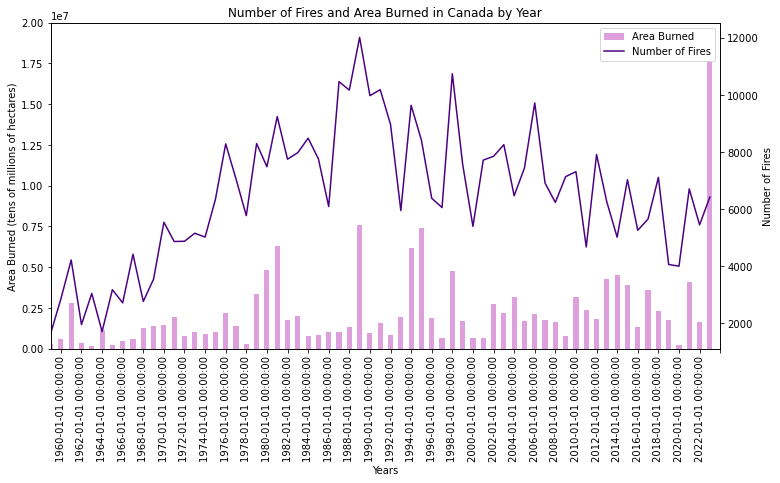

In [321]:
#plotting the wildfire graph
wfbar = wfdata.plot.bar(x = 'Years', y= 'Area Burned', color = 'plum',
                           rot=90, ylim= (0, 2e7)) #xticks = years(200, 900))
wfline = wfdata.plot.line(x = 'Years', y= 'Number of Fires', ylabel= 'Area Burned (tens of millions of hectares)',
                         c='indigo',
                           figsize= (12, 6), rot=90, title= 'Number of Fires and Area Burned in Canada by Year',
                        secondary_y=True, sharex= 1, ax = wfbar, use_index=False,
                         mark_right= False, xlim= (0,65), xticks = yearxval(1958, 2023)
                         )
wfbar.right_ax.set_ylabel('Number of Fires')



<AxesSubplot:title={'center':'Recent Monthly Mean CO₂ at Mauna Loa Observatory'}, xlabel='Year', ylabel='CO₂ mole fraction (ppm)'>

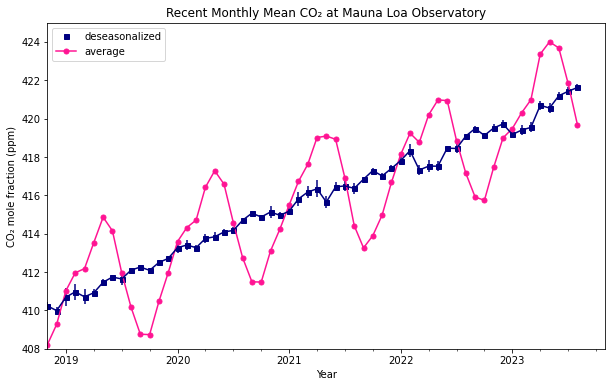

In [322]:
#plotting the co2 graph
co2err = co2data.plot.line(figsize = (10,6), x= 'Year', y= 'deseasonalized', c ='navy', ms = 5, yerr= 'unc', legend = False)
co2dses = co2data.plot.line(figsize = (10,6), x= 'Year', y= 'deseasonalized', c ='navy', ms = 5, style = 's', ax = co2err)
co2data.plot.line(x = 'Year', y= 'average', c = 'deeppink', style= '-o', ms = 5,
                 title= 'Recent Monthly Mean CO₂ at Mauna Loa Observatory', ylabel= 'CO₂ mole fraction (ppm)',
                    ax = co2dses, xlim = (586, 646), ylim=(408, 425)
                   )

<function matplotlib.pyplot.show(close=None, block=None)>

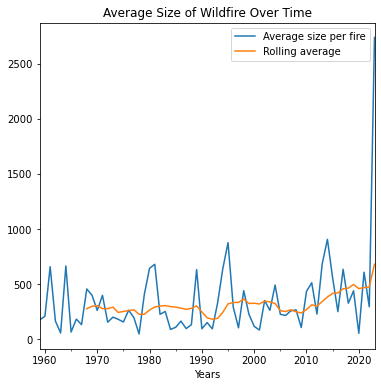

In [323]:
import matplotlib.pyplot as plt

#part 3
#average fire size
#objective: plot the total hectares by number of fires

numfir = wfdata['Number of Fires']
habur = wfdata['Area Burned']

#addind new stat (hectares total by number of fires)
firesize = habur/numfir
wfdata['Average size per fire'] = firesize

wfdata['Rolling average'] = wfdata['Average size per fire'].rolling(10).mean()

#plotting the lines
#ax1 = plt.plot(wfdata['Years'],wfdata['newstat'])
#ax2 = plt.plot(wfdata['Years'],wfdata['rolling'])
#title =''
#plt.show


#plotting
ax1 = wfdata.plot.line(x='Years', y= 'Average size per fire',
                     figsize= (6,6), title = 'Average Size of Wildfire Over Time' 
                     ) 
ax2 = wfdata.plot.line(x='Years', y='Rolling average', ax= ax1)
plt.show

<AxesSubplot:title={'center':'Recent Monthly Mean CO₂ at Mauna Loa Observatory'}, xlabel='Year', ylabel='CO₂ mole fraction (ppm)'>

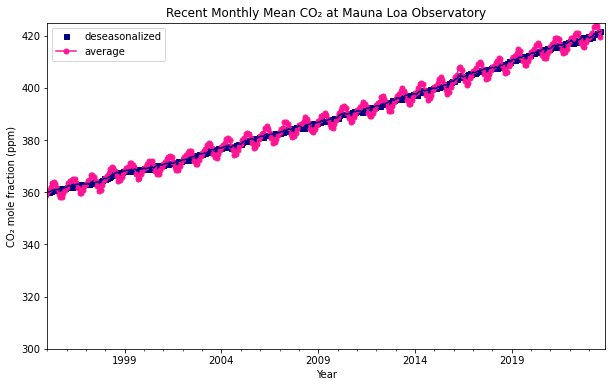

In [324]:
#plotting the co2 graph but this time the whole thing
co2err = co2data.plot.line(figsize = (10,6), x= 'Year', y= 'deseasonalized', c ='navy', ms = 5, yerr= 'unc', legend = False)
co2dses = co2data.plot.line(figsize = (10,6), x= 'Year', y= 'deseasonalized', c ='navy', ms = 5, style = 's', ax = co2err)
co2data.plot.line(x = 'Year', y= 'average', c = 'deeppink', style= '-o', ms = 5,
                 title= 'Recent Monthly Mean CO₂ at Mauna Loa Observatory', ylabel= 'CO₂ mole fraction (ppm)',
                    ax = co2dses, xlim = (300, 646), ylim=(300, 425)
                   )

C:\Users\asiab\AppData\Local\Temp\ipykernel_4344\2320760684.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearco2['yearlydiff'] = yearco2['yearly_average'].diff()
C:\Users\asiab\AppData\Local\Temp\ipykernel_4344\2320760684.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearco2['Rolling average'] = yearco2['yearlydiff'].rolling(10).mean()


<function matplotlib.pyplot.show(close=None, block=None)>

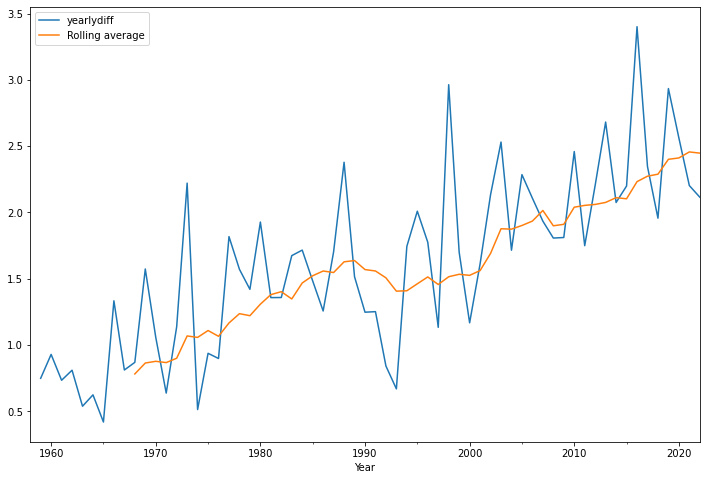

In [327]:
#chatGPT was prompted: hello. I'm working with a dataframe called 'Year' 
#with dates in a datetime format. I would like to take the yearly average
#of values in a column called 'average' and return those as a new column in 
#the dataframe called "yearly average". 

df = pd.DataFrame(co2data)

# Extract the year from the 'Date' column
df['year'] = df['Year'].dt.year

# Calculate the yearly average of 'average'
yearly_average = df.groupby('year')['average'].mean().reset_index()

# Merge the yearly averages back to the original DataFrame
df = pd.merge(df, yearly_average, on='year', how='left', suffixes=('', '_yearly_average'))

# Rename the new column
df = df.rename(columns={'average_yearly_average': 'yearly_average'})

#condensing the data into one yearly value
yearco2 = df.iloc[9::12, :]
yearco2['yearlydiff'] = yearco2['yearly_average'].diff()

#adding a rolling average
yearco2['Rolling average'] = yearco2['yearlydiff'].rolling(10).mean()

#plotting the graph
ax3= yearco2.plot.line(x = 'Year', y= 'yearlydiff', figsize = [12,8])
ax4= yearco2.plot.line(x='Year', y='Rolling average', ax= ax3)
plt.show

['Years' 'Number of Fires' 'Area Burned' 'MAX_SIZE_HA' 'FIRES >200ha'
 'TOTAL_HA (>200ha)' 'Average size per fire' 'Rolling average'
 'Rolling average area burned']
['Year' 'decimal date' 'average' 'deseasonalized' 'ndays' 'sdev' 'unc'
 'year' 'yearly_average' 'yearlydiff' 'Rolling average']


C:\Users\asiab\AppData\Local\Temp\ipykernel_4344\131409359.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearco2['Rolling average'] = yearco2['yearlydiff'].rolling(10).mean()


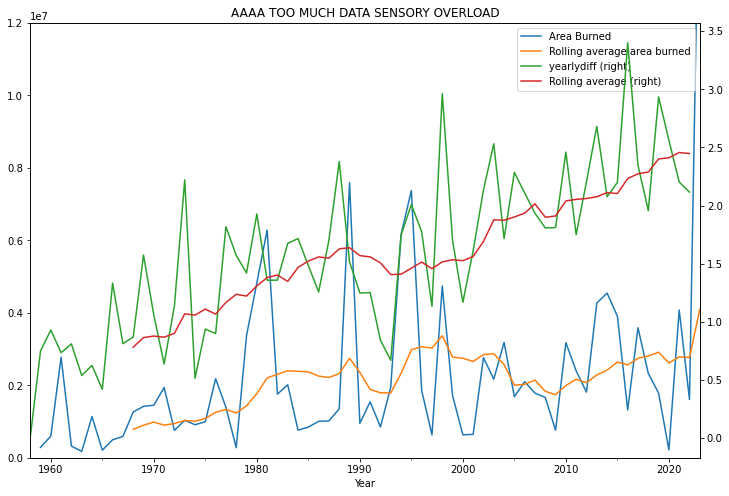

In [383]:
#import matplotlib.pyplot as plt

print(wfdata.columns.values)
print(yearco2.columns.values)




#fire data lines
wfdata['Rolling average area burned'] = wfdata['Area Burned'].rolling(10).mean()
ax1 = wfdata.plot.line(x='Years', y= 'Area Burned',
                     figsize= (12, 8), title = 'AAAA TOO MUCH DATA SENSORY OVERLOAD',
                     ylim=(0,12000000)
                     ) 
ax2 = wfdata.plot.line(x='Years', y='Rolling average area burned', ax= ax1)

#co2lines
yearco2['Rolling average'] = yearco2['yearlydiff'].rolling(10).mean()
ax5 = yearco2.plot.line(x= 'Year', y= 'yearlydiff', stacked= True,  ax= ax1,
                         secondary_y=True, sharex= True)
ax4= yearco2.plot.line(x='Year', y='Rolling average', ax= ax5, secondary_y= True)
#ax.right_ax.set_ylim(0,4)
plt.show()